In [1]:
import os
import json
from datetime import date


from sklearn import linear_model
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy



import myfunction
import GDTypeModel as gdt
import MeanValueModel as mvm


with open("./NTU_station.txt", 'r') as F:
    NTU_station = F.readline().split(",")
many_days = os.listdir("./release")[:-1]
train_days = many_days[:-21]

In [8]:
sta = "500101181"
data = myfunction.myDataloader(sta,train_days)

In [9]:
MV_model[sta].mean_value[0].shape

(1440,)

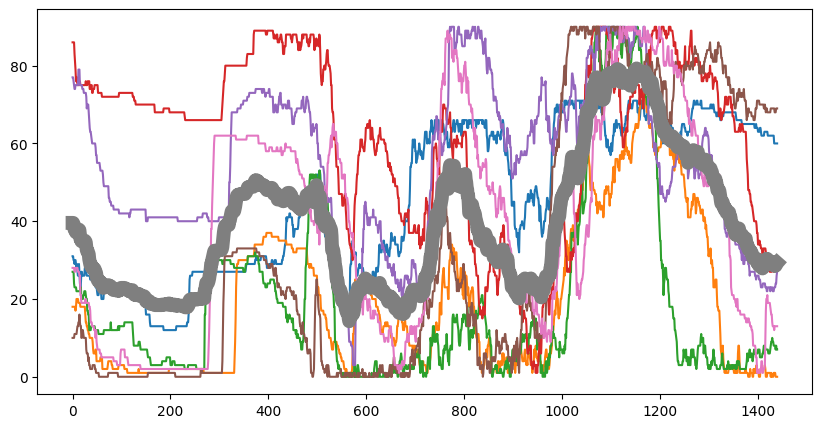

In [16]:
plt.figure(figsize=(10,5))
the_day = 6
for day in data[the_day]:
    plt.plot(day[:,-3])
plt.plot(MV_model[sta].mean_value[the_day],linewidth=10)

### 訓練時間 1 m 42.6 s

In [9]:
MV_model = mvm.generateMeanValueModels(NTU_station, train_days)

In [2]:
MV_model = myfunction.loadModel("./NTU_MV_model")

In [3]:
interval_1211_1217 = many_days[-14:-7]
interval_1218_1224 = many_days[-7:]

In [5]:
c = mvm.MVpredictionCertainPeriod(NTU_station, MV_model, interval_1218_1224,480,1361)
np.mean(c)

0.43609543288420843

In [17]:
b = mvm.MVprediction(NTU_station, MV_model, interval_1218_1224)
np.mean(b)

0.4304424210435101

In [7]:
d = mvm.MVpredictionCertainPeriod(NTU_station, MV_model, interval_1211_1217,480,1361)
np.mean(d)

0.3531994061258771

In [6]:
np.std(b)

0.21278016556848964

In [18]:
a = mvm.MVprediction(NTU_station, MV_model, interval_1211_1217)
np.mean(a)

0.33705661336719733

In [7]:
np.std(a)

0.1082135176576835